# ***Import Libraries***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from scipy.sparse import csr_matrix
from pandas.api.types import is_numeric_dtype
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import nltk
#nltk.download('punkt')


# ***Load Datasets***

In [2]:
books= pd.read_csv('E:\\Data Science\\Project\Project 4(Book Recommendation)\\Books.csv')
users= pd.read_csv('E:\\Data Science\\Project\Project 4(Book Recommendation)\\Users.csv')
ratings= pd.read_csv('E:\\Data Science\\Project\Project 4(Book Recommendation)\\Ratings.csv')

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# ***Exploratory Data Analysis(EDA)***

In [6]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


# ***Checking Missing Values***

In [10]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

***There is 1 missing value in Book-Author column, 2 missing values in Publisher column and 3 missing value in Image-URL-L column, total 6 missing values  in books dataset.***

In [11]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

***There is one missing values in ratings dataset.***

In [12]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

***There are no missing values in User-ID and Location columns but in Age columns almost 50% missing values in users dataset.*** 

# ***Checking duplicate values***

In [13]:
books.duplicated().sum()

0

In [14]:
ratings.duplicated().sum()

0

In [15]:
users.duplicated().sum()

0

***There is no duplicated values in books, ratings and users dataset.***

# ***Rename Columns***

In [16]:
books=books.rename({'Book-Title':'Title','Book-Author':'Author','Year-Of-Publication':'Publication_year'}, axis=1)
books.head()

,ISBN,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [17]:
ratings= ratings.rename({'User-ID':'UserID','Book-Rating':'Rating'}, axis=1)
ratings.head()

,UserID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [18]:
users= users.rename({'User-ID':'UserID'}, axis=1)
users.head()

,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [19]:
books.loc[books['Publisher'].isnull(),:]

,ISBN,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


***In Publisher column there are 2 missing values. So we should fill this value from checking google.***

In [20]:
books.loc[128890,'Publisher'] = 'Novelbooks Inc'
books.loc[129037,'Publisher'] = 'Scribner(US)'

In [21]:
books.loc[books['Author'].isnull(),:]

,ISBN,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


***In Author Column there is 1 missing value so we should fill it from google.***

In [22]:
books.loc[187689,'Author'] = ' Larissa Anne Downes'

In [23]:
books.loc[books['Image-URL-L'].isnull(),:]

,ISBN,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


***There are 3 missing values in Image-URL-L column. So we should fill it from google.***

In [24]:
books.loc[209538,'Image-URL-L']   = 'https://www.google.com/imgres?imgurl=https%3A%2F%2Fimg.thriftbooks.com%2Fapi%2Fimages%2Fm%2F81ef6103f314c881a8b92af1bfc0d695de942bf0.jpg&tbnid=FimQnJZS4ljzvM&vet=12ahUKEwj_uNC68OX-AhXxntgFHZ_kDKgQMygAegQIARAm..i&imgrefurl=https%3A%2F%2Fwww.thriftbooks.com%2Fw%2Fdk-readers-creating-the-x-men-how-comic-books-come-to-life-level-4-proficient-readersquot_james-buckley-jr%2F1293703%2F&docid=y8wLLE5Z0n1dxM&w=229&h=350&itg=1&q=DK%20Readers%3A%20Creating%20the%20X-Men%2C%20How%20It%20All%20Beg..%20books%20image%20url&ved=2ahUKEwj_uNC68OX-AhXxntgFHZ_kDKgQMygAegQIARAm'
books.loc[221678,'Image-URL-L']   =  'https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.thriftbooks.com%2Fw%2Fdk-readers-creating-the-x-men-how-comic-books-come-to-life-level-4-proficient-readersquot_james-buckley-jr%2F1293703%2F&psig=AOvVaw3Sl6GD8GqEj0JZbMNun8vg&ust=1683640875460000&source=images&cd=vfe&ved=2ahUKEwj9h-GT8eX-AhXmg2MGHZxaCnAQjRx6BAgAEAw'
books.loc[220731,'Image-URL-L']   = 'https://www.google.com/imgres?imgurl=https%3A%2F%2Fm.media-amazon.com%2Fimages%2FI%2F51czrzmpvJL._SX297_BO1%2C204%2C203%2C200_.jpg&tbnid=t0KUcrqnvrYmIM&vet=12ahUKEwjYp_3p8OX-AhXVJrcAHYj3AbkQMygBegQIARAn..i&imgrefurl=https%3A%2F%2Fwww.amazon.fr%2FPeuple-du-ciel-suivi-Bergers%2Fdp%2FB0071MUSZ2&docid=O0Vv_suKuZ8nrM&w=299&h=499&itg=1&q=Peuple%20du%20ciel%2C%20suivi%20de%20%27Les%20Bergers%5C%22%3BJean-M...%20books%20image%20url&ved=2ahUKEwjYp_3p8OX-AhXVJrcAHYj3AbkQMygBegQIARAn'

In [25]:
books.isnull().sum()

ISBN                0
Title               0
Author              0
Publication_year    0
Publisher           0
Image-URL-S         0
Image-URL-M         0
Image-URL-L         0
dtype: int64

**So there is no missing values in books dataset.**

In [26]:
#Print Unique Value
books.Publication_year.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [27]:
books[books['Publication_year'] == 'DK Publishing Inc']

,ISBN,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,https://www.google.com/imgres?imgurl=https%3A%...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,https://www.google.com/url?sa=i&url=https%3A%2...


In [28]:
#replacing the publication with 'DK Publishing Inc' input with 2000
books.loc[(books['Publication_year'] == 'DK Publishing Inc')] = 2000

In [29]:
books[books['Publication_year'] == 'Gallimard']

,ISBN,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,https://www.google.com/imgres?imgurl=https%3A%...


In [30]:
#replacing the publication with 'Gallimard' input with 2003
books.loc[(books['Publication_year'] == 'Gallimard')] = 2003

In [31]:
books['Publication_year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [32]:
books[books['Publication_year'] == '0']

,ISBN,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
196656,3442035368,Ich Gestehe,Heinz G. Konsalik,0,Wilhelm Goldmann Verlag GmbH,http://images.amazon.com/images/P/3442035368.0...,http://images.amazon.com/images/P/3442035368.0...,http://images.amazon.com/images/P/3442035368.0...
196678,0553124803,Being There,Jerzy Kosinski,0,Bantam Doubleday Dell,http://images.amazon.com/images/P/0553124803.0...,http://images.amazon.com/images/P/0553124803.0...,http://images.amazon.com/images/P/0553124803.0...
196680,888274387X,Vaniglia E Cioccolato,Modignani Casati,0,Sperling Paperback,http://images.amazon.com/images/P/888274387X.0...,http://images.amazon.com/images/P/888274387X.0...,http://images.amazon.com/images/P/888274387X.0...
196685,033368155X,Surreal Lives the Surrealists 1945,Ruth Brandon,0,Humanity Press/prometheus Bk,http://images.amazon.com/images/P/033368155X.0...,http://images.amazon.com/images/P/033368155X.0...,http://images.amazon.com/images/P/033368155X.0...
196734,0207158452,Games of the Strong,Glenda Adams,0,Harpercollins Publisher,http://images.amazon.com/images/P/0207158452.0...,http://images.amazon.com/images/P/0207158452.0...,http://images.amazon.com/images/P/0207158452.0...
...,...,...,...,...,...,...,...,...
261929,0760700702,100 Great Archaeological Discoveries,Paul G Bahn,0,Barnes Noble Inc,http://images.amazon.com/images/P/0760700702.0...,http://images.amazon.com/images/P/0760700702.0...,http://images.amazon.com/images/P/0760700702.0...
261930,0760701962,UFO's: A Scientific Debate,Carl Sagan,0,Barnes Noble Books,http://images.amazon.com/images/P/0760701962.0...,http://images.amazon.com/images/P/0760701962.0...,http://images.amazon.com/images/P/0760701962.0...
261931,0760706379,Only Way to Cross,John Maxtone Graham,0,Barnes Noble,http://images.amazon.com/images/P/0760706379.0...,http://images.amazon.com/images/P/0760706379.0...,http://images.amazon.com/images/P/0760706379.0...
262120,0880292288,New York Times Guide to Reference Materials,Mona Mccormick,0,Dorset House Publishing Co Inc,http://images.amazon.com/images/P/0880292288.0...,http://images.amazon.com/images/P/0880292288.0...,http://images.amazon.com/images/P/0880292288.0...


***Here values of  1048 rows in Publication_year is 0 due to some error. So we have to replace this value with the mean value of this column.***

In [33]:
#converting to integer type
books['Publication_year'] = books['Publication_year'].astype('int')

In [34]:
#Mean Imputation
mean= books['Publication_year'].mean()
print(mean)

1959.7612728478773


In [35]:
#replacing the publication with 0 input with nan values
books.loc[(books['Publication_year'] == 0)] = np.nan

In [36]:
books['Publication_year'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,   nan, 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 1938., 2030., 1911., 1904., 1949., 1932.,
       1928., 1929., 1927., 1931., 1914., 2050., 1934., 1910., 1933.,
       1902., 1924., 1921., 1900., 2038., 2026., 1944., 1917., 1901.,
       2010., 1908., 1906., 1935., 1806., 2021., 2012., 2006., 1909.,
       2008., 1378., 1919., 1922., 1897., 2024., 1376., 2037.])

In [37]:
#replacing the nan values in the publication year with mean of the same column
#books['Publication_year'].fillna((books['Publication_year'].mean()), inplace=True)
books['Publication_year']= books['Publication_year'].fillna(mean)
books

,ISBN,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [38]:
books['Publication_year'].unique()

array([2002.        , 2001.        , 1991.        , 1999.        ,
       2000.        , 1993.        , 1996.        , 1988.        ,
       2004.        , 1998.        , 1994.        , 2003.        ,
       1997.        , 1983.        , 1979.        , 1995.        ,
       1982.        , 1985.        , 1992.        , 1986.        ,
       1978.        , 1980.        , 1952.        , 1987.        ,
       1990.        , 1981.        , 1989.        , 1984.        ,
       1959.76127285, 1968.        , 1961.        , 1958.        ,
       1974.        , 1976.        , 1971.        , 1977.        ,
       1975.        , 1965.        , 1941.        , 1970.        ,
       1962.        , 1973.        , 1972.        , 1960.        ,
       1966.        , 1920.        , 1956.        , 1959.        ,
       1953.        , 1951.        , 1942.        , 1963.        ,
       1964.        , 1969.        , 1954.        , 1950.        ,
       1967.        , 2005.        , 1957.        , 1940.     

In [39]:
#converting to integer type
books['Publication_year'] = books['Publication_year'].astype('int')

In [40]:
books['Publication_year'].value_counts()[:10]

2002    17627
1999    17431
2001    17359
2000    17234
1998    15766
1997    14890
2003    14359
1996    14030
1995    13546
1994    11796
Name: Publication_year, dtype: int64

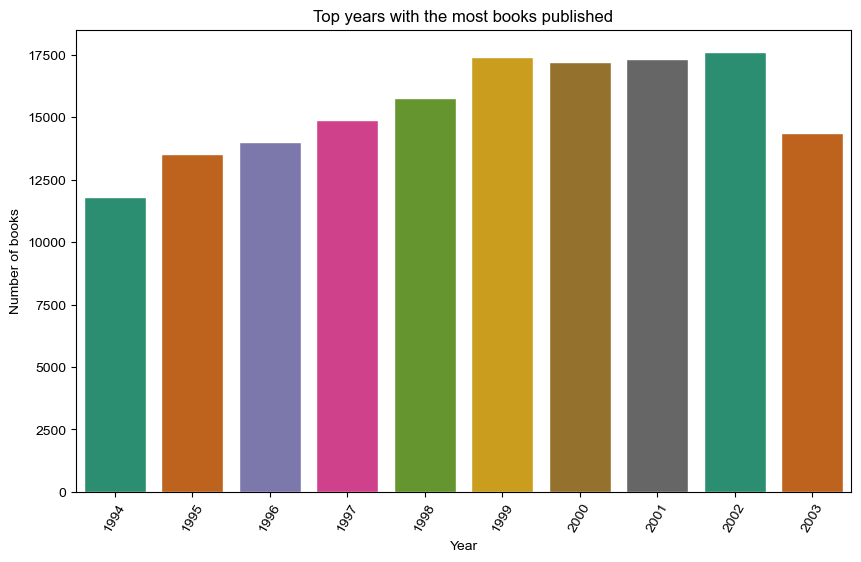

In [41]:
plt.subplots(figsize=(10,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['Publication_year'].value_counts()[:10].index,y = books['Publication_year'].value_counts()[:10].values,
            palette = 'Dark2').set(title = 'Top years with the most books published',xlabel = 'Year',ylabel = 'Number of books')
plt.xticks(rotation = 60)
plt.show()

***In the year 2002 most number of books has published.***

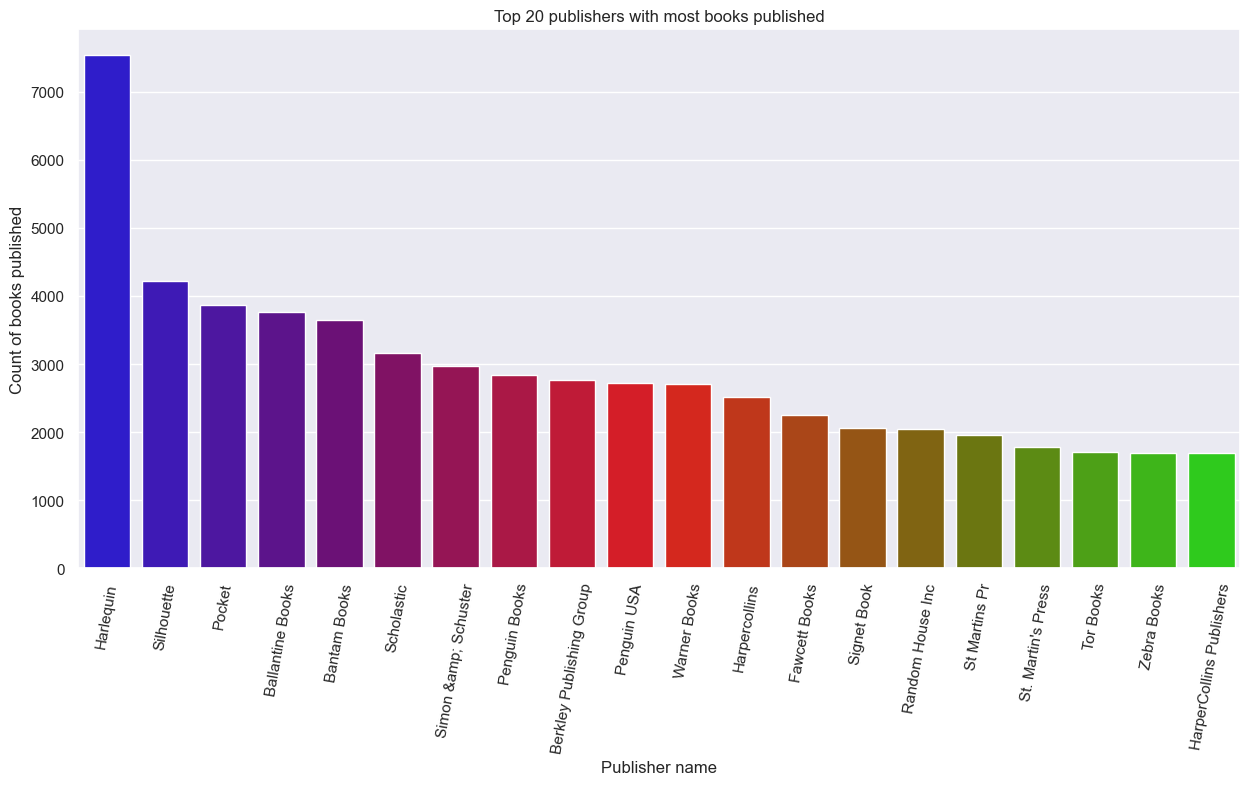

In [42]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['Publisher'].value_counts()[:20].index,y = books['Publisher'].value_counts()[:20].values,
            palette = 'brg').set(title = 'Top 20 publishers with most books published',xlabel = 'Publisher name',ylabel = 'Count of books published')
plt.xticks(rotation = 80)
plt.show()

***Harlequin has published more than 7000 books.***

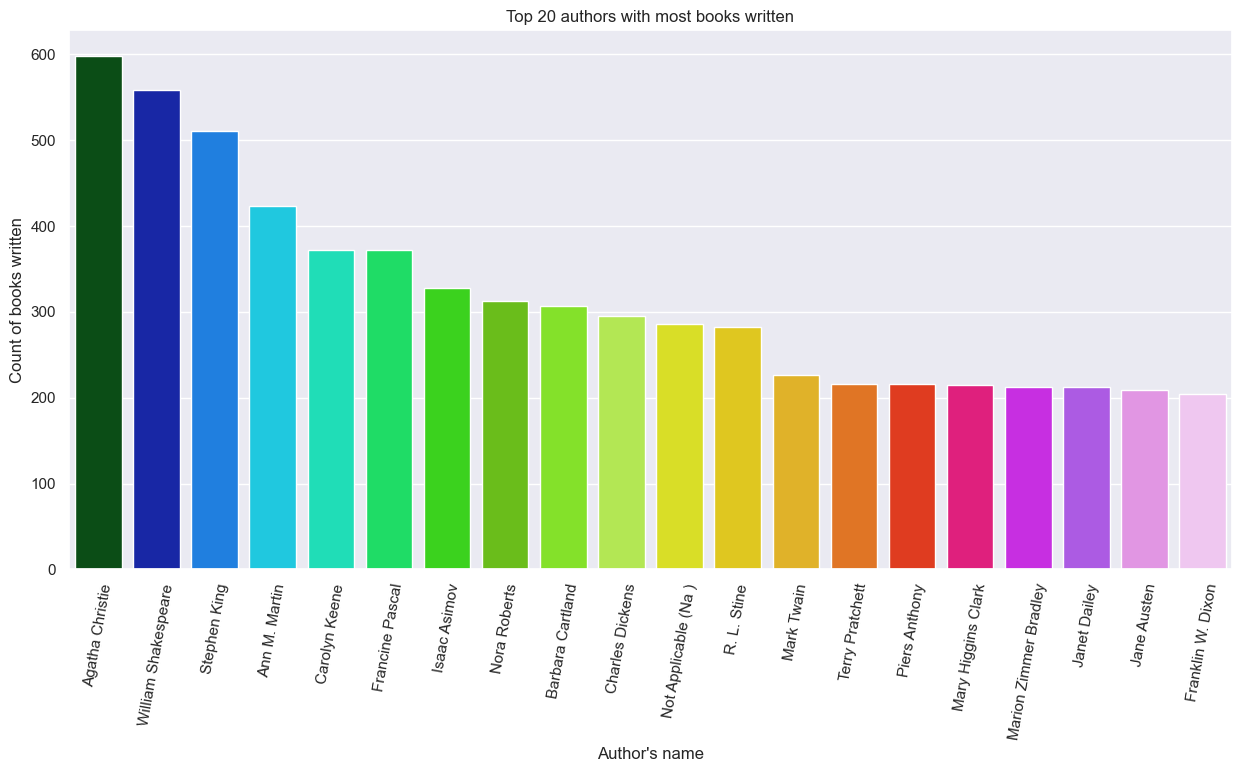

In [43]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['Author'].value_counts()[:20].index,y = books['Author'].value_counts()[:20].values,
            palette = 'gist_ncar').set(title = 'Top 20 authors with most books written',xlabel = "Author's name",ylabel = 'Count of books written')
plt.xticks(rotation = 80)
plt.show()

***Agatha Christie has writthen almost  600 books.***

In [44]:
ratings['Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

***Dropping the books whose rating is 0.*** 

In [45]:
ratings= ratings.loc[ratings['Rating'] != 0]


In [46]:
ratings['Rating'].unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [47]:
ratings['UserID'].value_counts()[:10]

11676     8524
98391     5802
153662    1969
189835    1906
23902     1395
76499     1036
171118    1035
235105    1023
16795      968
248718     948
Name: UserID, dtype: int64

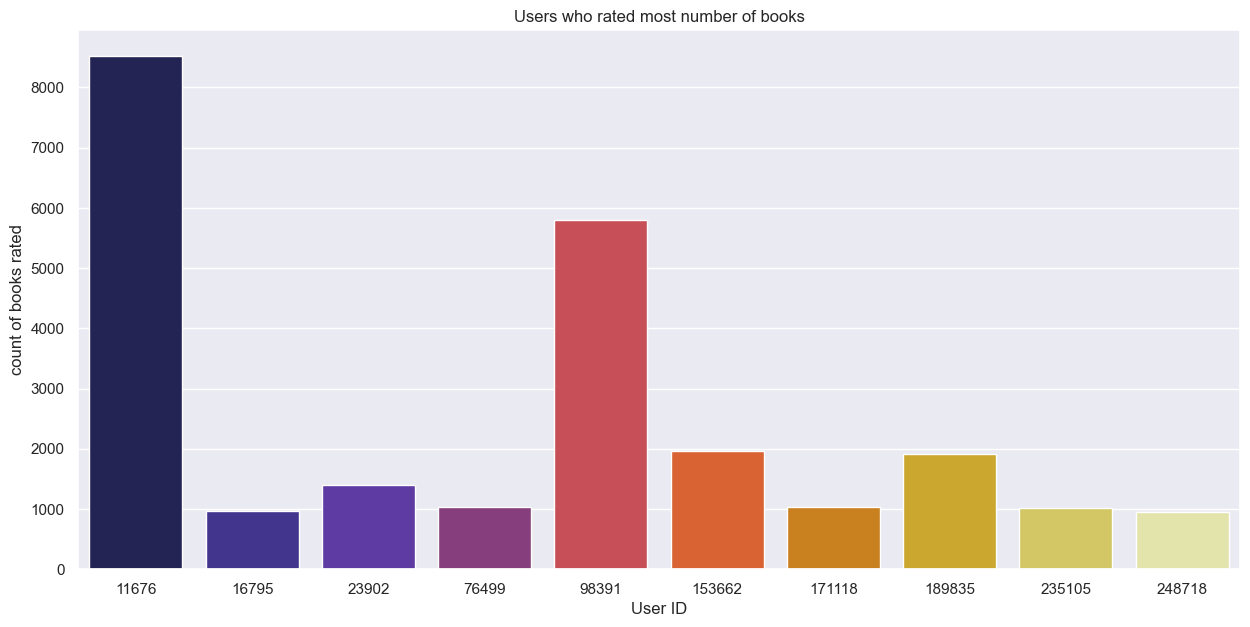

In [48]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = ratings['UserID'].value_counts()[0:10].index,y = ratings['UserID'].value_counts()[0:10].values,
            palette = 'CMRmap').set(title="Users who rated most number of books",xlabel = "User ID",ylabel = 'count of books rated')
plt.show()

***Users 11676 and 98391 has rated the most numbers of books.***

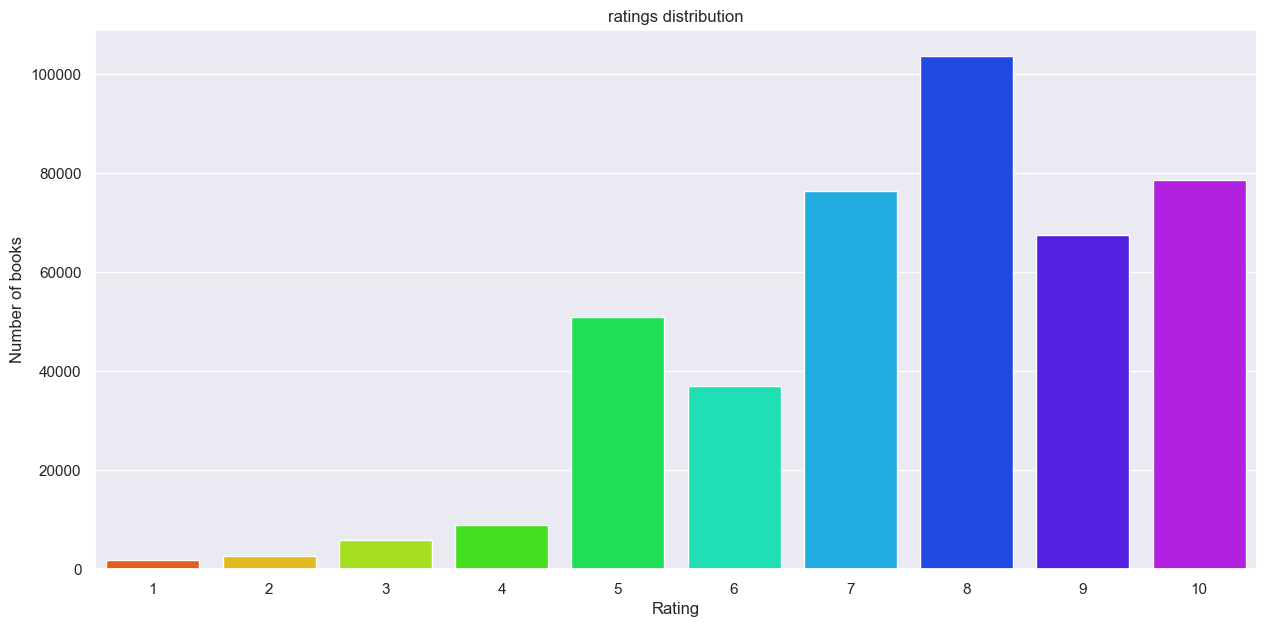

In [49]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = ratings['Rating'].value_counts().index,y = ratings['Rating'].value_counts().values,
            palette = 'gist_rainbow').set(title="ratings distribution",xlabel = "Rating",ylabel = 'Number of books')
plt.show()

***More than 100000 numbers of books got 8 ratings and more than 60000 numbers of books got 10 ratings.***

In [50]:
#Print unique value of Age of users dataset
print(users['Age'].unique())

[ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 108. 210.  88. 199. 147. 168. 132. 159. 186. 152. 102. 116.
 200. 115. 226. 137. 207. 229. 138. 109. 105. 228. 183. 204.  98. 223.
 113. 208. 107. 157. 111. 146. 118. 220. 143. 140. 189. 127.]


In [51]:
users.loc[(users['Age'] < 5) | (users['Age'] > 85),'Age'] = np.nan


In [52]:
#Mean Imputation
mean= users['Age'].mean()
print(mean)

34.71685995610511


In [53]:
users['Age']= users['Age'].fillna(mean)
users

,UserID,Location,Age
0,1,"nyc, new york, usa",34.71686
1,2,"stockton, california, usa",18.00000
2,3,"moscow, yukon territory, russia",34.71686
3,4,"porto, v.n.gaia, portugal",17.00000
4,5,"farnborough, hants, united kingdom",34.71686
...,...,...,...
278853,278854,"portland, oregon, usa",34.71686
278854,278855,"tacoma, washington, united kingdom",50.00000
278855,278856,"brampton, ontario, canada",34.71686
278856,278857,"knoxville, tennessee, usa",34.71686


In [54]:
#converting the age to integer type 
users['Age'] = users['Age'].astype('int')


In [55]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   UserID    278858 non-null  int64 
 1   Location  278858 non-null  object
 2   Age       278858 non-null  int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 5.3+ MB


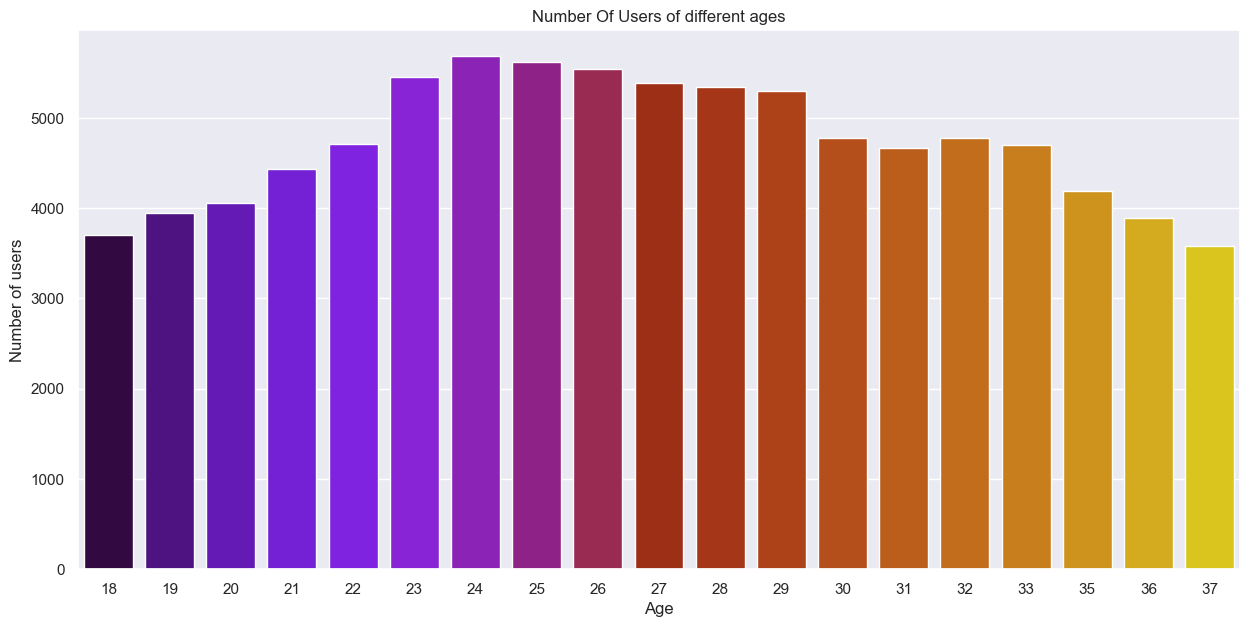

In [56]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = users['Age'].value_counts()[1:20].index,y = users['Age'].value_counts()[1:20].values,
            palette = 'gnuplot').set(title="Number Of Users of different ages",xlabel = "Age",ylabel = 'Number of users')
plt.show()

***There are more than 5000 users of age 23-29.***

# ***Popularity Based Recommender System***

In [57]:
books_ratings= ratings.merge(books, on='ISBN')
books_ratings

,UserID,ISBN,Rating,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
...,...,...,...,...,...,...,...,...,...,...
378053,276688,0425156737,2,Graven Images,Jane Waterhouse,1997,Berkley Publishing Group,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...
378054,276688,0671563149,6,MUDDY WATER (Peter Bartholomew Mysteries),Sally Gunning,1997,Pocket,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...
378055,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
378056,276704,0380796155,5,White Abacus,Damien Broderick,1998,Eos,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...


In [58]:
ratings_with_title = books_ratings.groupby('Title').count()['Rating'].reset_index()


In [59]:
ratings_with_title.rename(columns={'Rating':'num_rating'},inplace=True)
ratings_with_title

,Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
133374,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
133375,Ã?Â?rger mit Produkt X. Roman.,3
133376,Ã?Â?sterlich leben.,1
133377,Ã?Â?stlich der Berge.,1


In [60]:
avg_rating_df = books_ratings.groupby('Title').mean()['Rating'].reset_index()

In [61]:
avg_rating_df.rename(columns={'Rating':'avg_rating'},inplace=True)
avg_rating_df

,Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
...,...,...
133374,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
133375,Ã?Â?rger mit Produkt X. Roman.,7.000000
133376,Ã?Â?sterlich leben.,7.000000
133377,Ã?Â?stlich der Berge.,8.000000


In [62]:
popular_df = ratings_with_title.merge(avg_rating_df, on='Title')
popular_df

,Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
...,...,...,...
133374,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
133375,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
133376,Ã?Â?sterlich leben.,1,7.000000
133377,Ã?Â?stlich der Berge.,1,8.000000


In [63]:
popular_df=popular_df[popular_df['num_rating']>=100].sort_values('avg_rating',ascending=False).head(50)
popular_df

,Title,num_rating,avg_rating
117110,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882
113183,"The Return of the King (The Lord of the Rings,...",103,9.213592
44497,Harry Potter and the Goblet of Fire (Book 4),247,9.125506
44516,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500
44501,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393
44509,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321
121688,To Kill a Mockingbird,267,8.977528
44519,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508
33791,Ender's Game (Ender Wiggins Saga (Paperback)),151,8.920530
103029,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927


In [64]:
popular_df.merge(books, on='Title')

,Title,num_rating,avg_rating,ISBN,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,0345339711,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...
1,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,0618002235,J. R. R. Tolkien,1999,Houghton Mifflin Company,http://images.amazon.com/images/P/0618002235.0...,http://images.amazon.com/images/P/0618002235.0...,http://images.amazon.com/images/P/0618002235.0...
2,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,0618260595,J.R.R. Tolkien,2002,Houghton Mifflin,http://images.amazon.com/images/P/0618260595.0...,http://images.amazon.com/images/P/0618260595.0...,http://images.amazon.com/images/P/0618260595.0...
3,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,0395489334,J. R. R. Tolkien,1988,Houghton Mifflin Company,http://images.amazon.com/images/P/0395489334.0...,http://images.amazon.com/images/P/0395489334.0...,http://images.amazon.com/images/P/0395489334.0...
4,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,0618129081,J. R. R. Tolkien,2001,Houghton Mifflin Company,http://images.amazon.com/images/P/0618129081.0...,http://images.amazon.com/images/P/0618129081.0...,http://images.amazon.com/images/P/0618129081.0...
...,...,...,...,...,...,...,...,...,...,...
199,Prodigal Summer: A Novel,138,8.159420,0060959037,Barbara Kingsolver,2001,Perennial,http://images.amazon.com/images/P/0060959037.0...,http://images.amazon.com/images/P/0060959037.0...,http://images.amazon.com/images/P/0060959037.0...
200,The Joy Luck Club,208,8.153846,0804106304,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...
201,The Joy Luck Club,208,8.153846,0749336021,Amy Tan,1994,Minerva,http://images.amazon.com/images/P/0749336021.0...,http://images.amazon.com/images/P/0749336021.0...,http://images.amazon.com/images/P/0749336021.0...
202,The Joy Luck Club,208,8.153846,0749399570,Amy Tan,1991,Vintage,http://images.amazon.com/images/P/0749399570.0...,http://images.amazon.com/images/P/0749399570.0...,http://images.amazon.com/images/P/0749399570.0...


***There are many books whose name are same ,so we should drop duplicates names.***

In [65]:
popular_df=popular_df.merge(books, on='Title').drop_duplicates('Title')[['Title','Author','Image-URL-M','num_rating','avg_rating']]
popular_df.head()

,Title,Author,Image-URL-M,num_rating,avg_rating
0,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,136,9.330882
11,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339738.0...,103,9.213592
21,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,247,9.125506
23,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,176,9.062500
27,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,211,9.047393


# ***Colaborative Filtering Based Recommender System***

In [66]:
books_ratings.groupby('UserID').count()['Rating']

UserID
8          7
9          1
12         1
14         3
16         1
          ..
278846     1
278849     1
278851    14
278852     1
278854     6
Name: Rating, Length: 67076, dtype: int64

In [67]:
x=books_ratings.groupby('UserID').count()['Rating']>200
rating_users=x[x].index
rating_users

Int64Index([  4385,   6251,   6575,   7346,  11676,  13552,  16634,  16795,
             23768,  23872,
            ...
            257204, 258185, 261829, 262998, 264321, 265115, 265889, 269566,
            270713, 274061],
           dtype='int64', name='UserID', length=115)

***The above users have rated more than 200 books.***

In [68]:
filtered_ratings=books_ratings[books_ratings['UserID'].isin(rating_users)]
filtered_ratings

,UserID,ISBN,Rating,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
13,31315,038550120X,6,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
37,114368,038550120X,9,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
47,140358,038550120X,5,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
97,135149,0060517794,7,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...
...,...,...,...,...,...,...,...,...,...,...
377345,274061,1568821468,10,The Antarktos Cycle: Horror and Wonder at the ...,John Wood Campbell,1999,"Chaosium, Inc.",http://images.amazon.com/images/P/1568821468.0...,http://images.amazon.com/images/P/1568821468.0...,http://images.amazon.com/images/P/1568821468.0...
377346,274061,1569311803,10,No Need for Tenchi! (Book 1),Hitoshi Okuda,1997,Viz Communications,http://images.amazon.com/images/P/1569311803.0...,http://images.amazon.com/images/P/1569311803.0...,http://images.amazon.com/images/P/1569311803.0...
377347,274061,1569312540,10,Sword Play (No Need for Tenchi! Book 2),Hitoshi Okuda,1997,Viz Communications,http://images.amazon.com/images/P/1569312540.0...,http://images.amazon.com/images/P/1569312540.0...,http://images.amazon.com/images/P/1569312540.0...
377348,274061,1891153870,9,Book of All Flesh,James Lowder,2001,Excelsior Games,http://images.amazon.com/images/P/1891153870.0...,http://images.amazon.com/images/P/1891153870.0...,http://images.amazon.com/images/P/1891153870.0...


***filtered_ratings dataframe has filtered on the basis of users (Who rated more than 200 books)***

In [69]:
y=filtered_ratings.groupby('Title').count()['Rating']>=6
famous_books=y[y].index
famous_books

Index(['16 Lighthouse Road', '1984', '1st to Die: A Novel', '2nd Chance',
       '84 Charing Cross Road', 'A Bend in the Road',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Confederacy of Dunces (Evergreen Book)',
       'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
       'A Knight in Shining Armor',
       ...
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Xanth 15: The Color of Her Panties',
       'Year of Wonders', 'You Belong To Me', 'You Belong to Me', 'Yukon Ho!',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Title', length=660)

In [70]:
final_ratings=filtered_ratings[filtered_ratings['Title'].isin(famous_books)]
final_ratings

,UserID,ISBN,Rating,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
13,31315,038550120X,6,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
37,114368,038550120X,9,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
47,140358,038550120X,5,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
160,11676,0684867621,3,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...
...,...,...,...,...,...,...,...,...,...,...
363547,235105,0446359173,6,Daddy,Loup Durand,1990,Warner Books,http://images.amazon.com/images/P/0446359173.0...,http://images.amazon.com/images/P/0446359173.0...,http://images.amazon.com/images/P/0446359173.0...
368839,248718,031202164X,8,Ashes to Ashes,Mary Monica Pulver,1988,Horizon Book Promotions,http://images.amazon.com/images/P/031202164X.0...,http://images.amazon.com/images/P/031202164X.0...,http://images.amazon.com/images/P/031202164X.0...
371406,254206,555053150X,9,Christine,Stephen King,1983,Viking Books,http://images.amazon.com/images/P/555053150X.0...,http://images.amazon.com/images/P/555053150X.0...,http://images.amazon.com/images/P/555053150X.0...
377341,274061,1551663147,10,Fever,Elizabeth Lowell,1997,Mira,http://images.amazon.com/images/P/1551663147.0...,http://images.amazon.com/images/P/1551663147.0...,http://images.amazon.com/images/P/1551663147.0...


***final_ratings dataframe has filtered on the basis of books(Which books are rated 6 or more than 6)***

In [71]:
pt=final_ratings.pivot_table(index='Title',columns='UserID',values='Rating')
pt

UserID,4385,6251,6575,7346,11676,13552,16634,16795,23768,23872,...,257204,258185,261829,262998,264321,265115,265889,269566,270713,274061
Title,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,...,NaN,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You Belong to Me,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
Yukon Ho!,NaN,10.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
pt.fillna(0,inplace=True)
pt

UserID,4385,6251,6575,7346,11676,13552,16634,16795,23768,23872,...,257204,258185,261829,262998,264321,265115,265889,269566,270713,274061
Title,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,8.0,10.0,0.0,0.0,8.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,9.0,0.0,0.0,9.0,0.0,0.0,...,0.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,7.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You Belong to Me,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
Yukon Ho!,0.0,10.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ***Calculate cosine_similarity of every rows of pt with every rows of pt***

In [73]:
similarity_score=cosine_similarity(pt)
similarity_score

array([[1.        , 0.        , 0.09241456, ..., 0.20440713, 0.        ,
        0.13824188],
       [0.        , 1.        , 0.32517147, ..., 0.30739714, 0.20106621,
        0.17857621],
       [0.09241456, 0.32517147, 1.        , ..., 0.14610385, 0.30727322,
        0.18664297],
       ...,
       [0.20440713, 0.30739714, 0.14610385, ..., 1.        , 0.10142884,
        0.0793274 ],
       [0.        , 0.20106621, 0.30727322, ..., 0.10142884, 1.        ,
        0.22585675],
       [0.13824188, 0.17857621, 0.18664297, ..., 0.0793274 , 0.22585675,
        1.        ]])

In [74]:
similarity_score.shape

(660, 660)

***660 books euclidian distance is calculated with 660 books***

In [75]:
def recommend(book_name):
  # index fetch
    index=np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])), key=lambda x:x[1],reverse=True)[1:6]

    data=[]
    for i in similar_items:
        item = []
        temp_df = books[books['Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Title')['Title'].values))
        item.extend(list(temp_df.drop_duplicates('Title')['Author'].values))
        item.extend(list(temp_df.drop_duplicates('Title')['Image-URL-M'].values))
        
        data.append(item) 
    return data

In [76]:
books[books['Title'] == pt.index[0]]

,ISBN,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
33529,1551668300,16 Lighthouse Road,Debbie Macomber,2001,Mira,http://images.amazon.com/images/P/1551668300.0...,http://images.amazon.com/images/P/1551668300.0...,http://images.amazon.com/images/P/1551668300.0...


In [77]:
pt.index[621]

'Until You'

In [78]:
#Print the similarity_score with every row
sorted(list(enumerate(similarity_score[0])), key=lambda x:x[1],reverse=True)[1:6]

[(621, 0.6372655368413102),
 (397, 0.5897254155470726),
 (130, 0.5808078752370709),
 (273, 0.5793483358805103),
 (571, 0.5673284461104704)]

In [79]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ['By the Shores of Silver Lake (Little House)',
  'Laura Ingalls Wilder',
  'http://images.amazon.com/images/P/0064400050.01.MZZZZZZZ.jpg']]

# ***Content Based Recommender System***

In [80]:
books_ratings

,UserID,ISBN,Rating,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
...,...,...,...,...,...,...,...,...,...,...
378053,276688,0425156737,2,Graven Images,Jane Waterhouse,1997,Berkley Publishing Group,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...
378054,276688,0671563149,6,MUDDY WATER (Peter Bartholomew Mysteries),Sally Gunning,1997,Pocket,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...
378055,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
378056,276704,0380796155,5,White Abacus,Damien Broderick,1998,Eos,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...


In [81]:
cv = CountVectorizer(max_features=5000,stop_words='english')

In [82]:
new_book= books_ratings[['UserID','ISBN','Rating','Title','Author','Image-URL-M']]
new_book=new_book.head(5000)

In [83]:
new_book

,UserID,ISBN,Rating,Title,Author,Image-URL-M
0,276726,0155061224,5,Rites of Passage,Judith Rae,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,http://images.amazon.com/images/P/038550120X.0...
...,...,...,...,...,...,...
4995,57157,0440236053,6,Writ of Execution,Perri O'Shaughnessy,http://images.amazon.com/images/P/0440236053.0...
4996,57833,0440236053,5,Writ of Execution,Perri O'Shaughnessy,http://images.amazon.com/images/P/0440236053.0...
4997,102275,0440236053,9,Writ of Execution,Perri O'Shaughnessy,http://images.amazon.com/images/P/0440236053.0...
4998,108141,0440236053,9,Writ of Execution,Perri O'Shaughnessy,http://images.amazon.com/images/P/0440236053.0...


In [84]:
new_book.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999],
           dtype='int64', length=5000)

In [85]:
new_book['Author'][9]

'JOHN GRISHAM'

In [86]:
new_book['Title'][0]

'Rites of Passage'

In [87]:
vector = cv.fit_transform(new_book['Author']).toarray()
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [88]:
vector.shape

(5000, 442)

In [89]:
vector = vector.astype(np.float32)
similarity = cosine_similarity(vector)
similarity

array([[0.99999994, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.99999994, 0.99999994,
        0.99999994],
       [0.        , 0.        , 0.        , ..., 0.99999994, 0.99999994,
        0.99999994],
       [0.        , 0.        , 0.        , ..., 0.99999994, 0.99999994,
        0.99999994]], dtype=float32)

In [90]:
def recommend(BookName):
    index = new_book[new_book['Title'] == BookName].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_book.iloc[i[0]].Title)
         

In [91]:
recommend('Rites of Passage')

Die MÃ?Â¤dchen mit den dunklen Augen.
Sommerhaus, spÃ?Â¤ter. ErzÃ?Â¤hlungen.
Sommerhaus, spÃ?Â¤ter. ErzÃ?Â¤hlungen.
Sommerhaus, spÃ?Â¤ter. ErzÃ?Â¤hlungen.
Alamut


# ***MEMORY BASED COLLABORATIVE FILTERING - ITEM BASED***

In [92]:
#merging the books, users and ratings file
merge_df_1=books.merge(ratings,how="left", on="ISBN")
merge_df_2=merge_df_1.merge(users,how="left", on="UserID")
df=merge_df_2.copy()
df.head()

,ISBN,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,UserID,Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,NaN,NaN,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0,"timmins, ontario, canada",34.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0,"n/a, n/a, n/a",34.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544.0,8.0,"toronto, ontario, canada",30.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,116866.0,9.0,"ottawa, ,",34.0


In [93]:
#dropping the location and age columns as they are not relevant for recommender model
df.drop(['Location','Age'], axis=1, inplace=True)


In [94]:
df.shape

(502303, 10)

In [95]:
df

,ISBN,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,UserID,Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,116866.0,9.0
...,...,...,...,...,...,...,...,...,...,...
502298,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463.0,7.0
502299,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579.0,4.0
502300,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,NaN,NaN
502301,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,NaN,NaN


In [96]:
#we will only keep the observations that have book_rating greater than 0
df = df[df["Rating"]>0]

In [97]:
df

,ISBN,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,UserID,Rating
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,116866.0,9.0
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,123629.0,9.0
...,...,...,...,...,...,...,...,...,...,...
502289,0395264707,Dreamsnake,Vonda N. McIntyre,1978,Houghton Mifflin,http://images.amazon.com/images/P/0395264707.0...,http://images.amazon.com/images/P/0395264707.0...,http://images.amazon.com/images/P/0395264707.0...,275318.0,10.0
502295,1845170423,Cocktail Classics,David Biggs,2004,Connaught,http://images.amazon.com/images/P/1845170423.0...,http://images.amazon.com/images/P/1845170423.0...,http://images.amazon.com/images/P/1845170423.0...,275970.0,7.0
502297,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,276313.0,5.0
502298,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463.0,7.0


In [98]:
df.shape

(378058, 10)

In [99]:
#counting the number of times the books have been rated
count_of_books  = pd.DataFrame(df["Title"].value_counts())

In [100]:
count_of_books

,Title
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393
...,...
Chicken Soup for the Writer's Soul: Stories to Open the Heart and Rekindle the Spirit of Writers (Chicken Soup for the Soul (Audio Health Communications)),1
The French Lieutenant's Woman (Audio Editions),1
101 Common Therapeutic Blunders,1
If I Live to Be 100 : Lessons from the Centenarians,1


In [101]:
count_of_books.sort_values("Title", ascending=False)

,Title
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393
...,...
Everyday Prayers (Hands Together Series),1
Adams Street Antiques,1
Palaces of Dreams: Movie Theater Postcards,1
Barbie: My Favorite Teacher (Career Series),1


In [102]:
#All the books that have been rated less than 100 times - we will count them as rarely read books
rare_books = count_of_books[count_of_books["Title"] <= 100].index
rare_books

Index(['Deception Point', 'Daddy's Little Girl', 'Cause of Death',
       'The Queen of the Damned (Vampire Chronicles (Paperback))', 'Congo',
       'Disclosure',
       'Don't Sweat the Small Stuff and It's All Small Stuff : Simple Ways to Keep the Little Things from Taking Over Your Life (Don't Sweat the Small Stuff Series)',
       'Middlesex: A Novel', 'Night',
       'What Looks Like Crazy On An Ordinary Day',
       ...
       'Blood of Eagles', 'Transcending: Reflections of Crime Victims',
       'Batavia (Images of America)', 'Being in the Zone (Smart Tapes)',
       'The Disappearance of Sherlock Holmes',
       'Chicken Soup for the Writer's Soul: Stories to Open the Heart and Rekindle the Spirit of Writers (Chicken Soup for the Soul (Audio Health Communications))',
       'The French Lieutenant's Woman (Audio Editions)',
       '101 Common Therapeutic Blunders',
       'If I Live to Be 100 : Lessons from the Centenarians',
       'From One to One Hundred'],
      dtype='obj

In [103]:
rare_books.shape

(133188,)

In [104]:
#All the books that are not in the rare books we will count them as frequently read books
frequent_books = df[~df["Title"].isin(rare_books)]
frequent_books.head()

,ISBN,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,UserID,Rating
19,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676.0,9.0
20,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,29526.0,9.0
21,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398.0,9.0
22,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,49635.0,9.0
23,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,67958.0,10.0


In [105]:
#Let's create the User-Book matrix(Pivot table) for the frequently read books
books_user_df = frequent_books.pivot_table(index=["UserID"], columns=["Title"], values="Rating",fill_value=0)
books_user_df.head()

Title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,...,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus,"\O\"" Is for Outlaw"""
UserID,,,,,,,,,,,,,,,,,,,,,
16.0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,...,0,0,0.0,0,0,0.0,0,0,0,0
26.0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,...,0,0,0.0,0,0,0.0,0,0,0,0
32.0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,...,0,0,0.0,0,0,0.0,0,0,0,0
51.0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,...,0,0,0.0,0,0,0.0,0,0,0,0
91.0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,...,0,0,0.0,0,0,0.0,0,0,0,0


In [106]:
books_user_df.shape

(16349, 191)

In [115]:
book="The Lovely Bones: A Novel"

In [116]:
books_user_df[book]

UserID
16.0        0
26.0        0
32.0        0
51.0        0
91.0        0
           ..
278800.0    0
278836.0    0
278843.0    0
278844.0    0
278846.0    0
Name: The Lovely Bones: A Novel, Length: 16349, dtype: int64

In [117]:
book=books_user_df[book]
book.sort_values(ascending=False)

UserID
149211.0    10
52002.0     10
246354.0    10
19107.0     10
276670.0    10
            ..
94396.0      0
94408.0      0
94485.0      0
94494.0      0
278846.0     0
Name: The Lovely Bones: A Novel, Length: 16349, dtype: int64

In [118]:
books_user_df.corrwith(book,method='pearson').sort_values(ascending=False)[:10]

Title
The Lovely Bones: A Novel                             1.000000
Lucky : A Memoir                                      0.093401
Where the Heart Is (Oprah's Book Club (Paperback))    0.065307
Life of Pi                                            0.061970
The Book of Ruth (Oprah's Book Club (Paperback))      0.056048
Good in Bed                                           0.055629
Suzanne's Diary for Nicholas                          0.054092
The Secret Life of Bees                               0.053762
The Da Vinci Code                                     0.053408
She's Come Undone (Oprah's Book Club)                 0.045840
dtype: float64

In [119]:
recommend_books=books_user_df.corrwith(book).sort_values(ascending=False)[:10]
rec_books_list=list(recommend_books.index)

rec_books_list

['The Lovely Bones: A Novel',
 'Lucky : A Memoir',
 "Where the Heart Is (Oprah's Book Club (Paperback))",
 'Life of Pi',
 "The Book of Ruth (Oprah's Book Club (Paperback))",
 'Good in Bed',
 "Suzanne's Diary for Nicholas",
 'The Secret Life of Bees',
 'The Da Vinci Code',
 "She's Come Undone (Oprah's Book Club)"]

# ***Create Pickle File***

In [122]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(similarity_score,open('similarity_score.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))


In [114]:
books.drop_duplicates('Title')

,ISBN,Title,Author,Publication_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
